<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_EcuacionesDiferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscilacones Acopladas

Considere dos osciladores acoplados, de masas idénticas y  conectadas mediante tres resortes de constantes elásticas $k_1, k_2, k_3$. Como se muestra en la figura.





In [7]:
import matplotlib.pylab as plt
from scipy.integrate import odeint
import numpy as np
import scipy as sp
#from google.colab import files
#from IPython.display import Image
#uploaded = files.upload()


In [8]:
plt.figure(figsize=(10,8))
#im = plt.imread("fig0.png")
#plt.imshow(im)
#plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>




Después de realizar un análisis detallado del problema, a través de las leyes de Newton ó empleando las ecuaciones de Euler-Lagrange, se puede mostrar que las ecuaciones de movimiento para el sistema vienen dadas por: 

\begin{equation}
m_1 \frac{ \mathrm{d}^2 x_1 }{\mathrm{d}t^2} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2 \frac{ \mathrm{d}^2 x_2 }{\mathrm{d}t^2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

De forma compacta,  la ecuacion anterior puede ser escrita como: 


\begin{equation}
m_1 \ddot{x_1} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2  \ddot{x_2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

donde $\ddot{x} =\frac{\mathrm{d^2}x}{\mathrm{d}t^2}$.

Las ecuaciones anteriores, son ecuaciones diferenciales lineales de segundo orden y acopladas, que pueden ser escritas de forma matricial como $m\vec{\ddot{x}}= -A\vec{x}$, donde A, es una matriz simétrica: 

\begin{equation}
m
\begin{pmatrix} 
\ddot{x_1}  \\
\ddot{x_2}    
\end{pmatrix}
=-
\begin{pmatrix} 
k_1 + k_2 & -k_2  \\
-k_2       &  k_2+k_3  \\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
\end{equation}


Para resolver el sistema de ecuaciones acopladas, se puede realizar una transformación, que permite desacoplar el sistema de ecuaciones diferenciales. Sea
 $\vec{\eta}=S\vec{x}$, donde $\eta$ es una nueva variable en el sistema transformado y S una matriz que cumple que $SAS^{-1}=A_d$, siendo $A_d$ una matriz diagonal. 
 
 Se cumple que $\vec{\ddot {\eta}}=S\vec{\ddot{x}}$ 
 y  $m\vec{\ddot{x}}=A\vec{x}$, multiplicando por una matriz S, a ambos lados de la ecuación $m\vec{\ddot{x}}=-A\vec{x}$ obtenemos: 

\begin{equation}
mS\vec{\ddot{x}}=- S A\vec{x}
\end{equation}

\begin{equation}
m \vec{\ddot{\eta}} = -S A S^{-1}S\vec{x}
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -(S A S^{-1})\eta
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -A_d\eta
\end{equation}

\begin{equation}
m\begin{pmatrix} 
\ddot{\eta_1}\\
\ddot{\eta_2}
\end{pmatrix}
=
-\begin{pmatrix} 
\lambda_1 & 0\\
0          &\lambda_2
\end{pmatrix}
\begin{pmatrix} 
\eta_1\\
\eta_2
\end{pmatrix},
\end{equation}

donde $\lambda=m\omega^2$ son los autovalores de A. Notese que S es la matriz formada por los autovectores de A. La ecuacion anterior, tiene solución en términos de funciones armónicas.


Basado en lo anterior, y resolviendo  el problema más sencillo en el que $k_1 = k_3 = k$, tenemos que:


\begin{equation}
\begin{pmatrix} 
\frac{k + k_2}{m}-\omega^2 & -\frac{k_2}{m}\\
 -\frac{k_2}{m}          &\frac{k_2 + k}{m}-\omega^2
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
=
-\begin{pmatrix} 
0\\
0
\end{pmatrix}
\end{equation}


\begin{equation}
det(A-\omega^2 I)= \left(\frac{k + k_2}{m}-\omega^2\right) \left(\frac{k_2+k}{m}-\omega^2\right )-\frac{k_2^2}{m^2}=0
\end{equation}

Resolviendo para $\omega^2$, tenemos que : 

\begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}, 
\end{equation}


los autovecres vienen dados por: 

\begin{equation}
\vec{v_1}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
-1
\end{pmatrix}
\end{equation}


\begin{equation}
\vec{v_2}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
1
\end{pmatrix}
\end{equation}

y la matriz S, viene dada por: 


\begin{equation}
S=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
1 & 1
\end{pmatrix}
\end{equation}

las variables $x_1,x_2$, en terminos de $\eta$ están dadas por: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}

En conclusión el problema puede ser resuelto, si solucionamos la 
ecuaciones diferenciables desacopladas: 
\begin{equation}
\ddot{\eta_1}+\omega_1\eta_1=0
\end{equation}

\begin{equation}
\ddot{\eta_2}+\omega_2\eta_2=0
\end{equation}

 con: 
 
 \begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}
\end{equation}




In [9]:
#@title Comprobacion del metodo

In [10]:
#condicion inicial

pos_ini = 2
velo_ini = 1e-10

y0 = np.array([pos_ini, velo_ini])

#Tiempo de integracion

t = np.linspace(00,100,100000)

params = (300, 59)

In [11]:
def func_v(y,t, m1, k):

  w2 = (k / m1)

  dx_dt = y[1]

  dv_dt = -w2 * y[0]

  
  return np.array([dx_dt, dv_dt])

In [12]:
sol = odeint(func_v, y0, t, params)

In [13]:
sol

array([[ 2.00000000e+00,  1.00000000e-10],
       [ 1.99999980e+00, -3.93337143e-04],
       [ 1.99999921e+00, -7.86674310e-04],
       ...,
       [ 1.86901050e+00, -3.15707630e-01],
       [ 1.86869460e+00, -3.16075175e-01],
       [ 1.86837834e+00, -3.16442657e-01]])

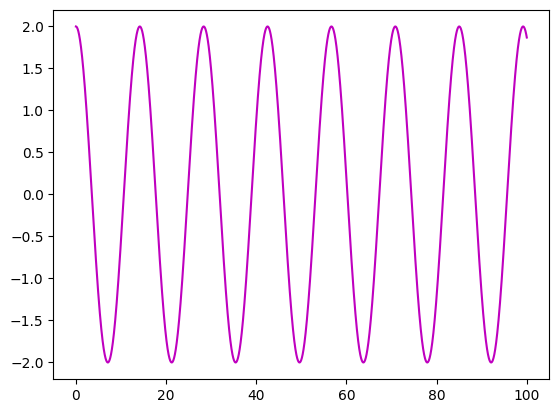

In [14]:
plt.plot(t,sol[:,0], color = 'm')

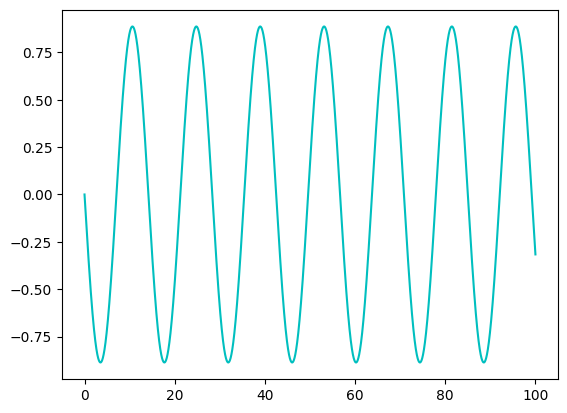

In [15]:
plt.plot(t,sol[:,1], color = 'c')

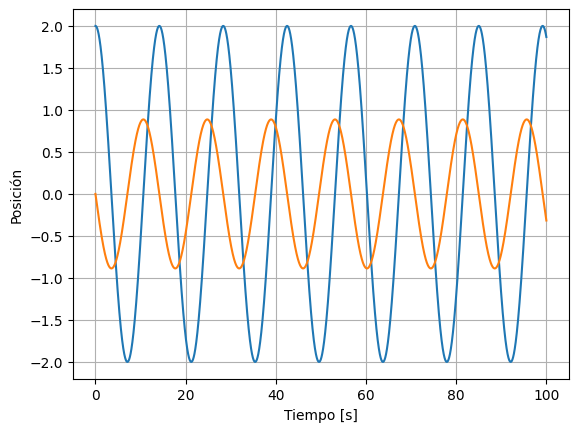

In [16]:
plt.plot(t,sol)
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición')
plt.grid()

In [17]:
#@title Solucion osciladores acoplados

In [18]:
#condicion inicial

pos_ini1 = 2
velo_ini1 = 1e-10

pos_ini2 = 3
velo_ini2 = 1e-6

y_ = np.array([pos_ini1, velo_ini1, pos_ini2, velo_ini2])


#Tiempo de integracion

t = np.linspace(00,100,100000)

params = (300, 59, 298, 56, 300, 58)


In [19]:
def fun_acoplados(y, t, m1, k1, m2, k2, m3, k3):

  x1=y[0]
  v1=y[1]
  x2=y[2]
  v2=y[3]

  dx1_dt = v1

  dv1_dt = (-k1 * x1 + k2 * (x2 - x1)) / m1


  dv2_dt = (-k3 * x2 + k2 * (x2 - x1)) / m2

  dx2_dt = v2
  
  return np.array([dx1_dt, dv1_dt, dx2_dt, dv2_dt])

In [20]:
solu = odeint(fun_acoplados, y_, t, params)
solu

array([[ 2.00000000e+00,  1.00000000e-10,  3.00000000e+00,
         1.00000000e-06],
       [ 1.99999990e+00, -2.06668632e-04,  2.99999980e+00,
        -3.94977101e-04],
       [ 1.99999959e+00, -4.13337358e-04,  2.99999921e+00,
        -7.90954162e-04],
       ...,
       [-2.82988757e-01,  3.28873013e+00, -8.52740908e-01,
         3.40521290e+00],
       [-2.79700019e-01,  3.28867912e+00, -8.49335632e-01,
         3.40527149e+00],
       [-2.76411333e-01,  3.28862748e+00, -8.45930297e-01,
         3.40532943e+00]])

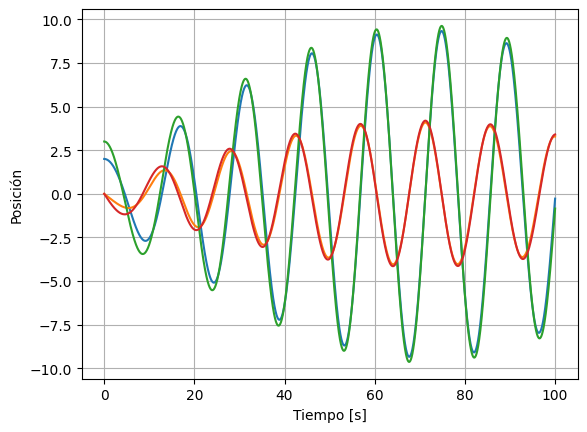

In [21]:
plt.plot(t,solu)
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición')
plt.grid()

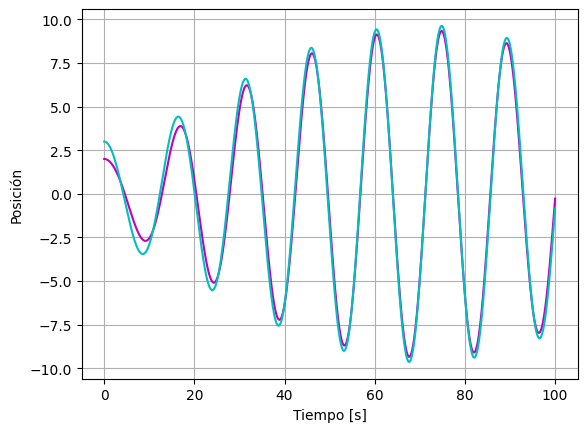

In [22]:
plt.plot(t,solu[:,0], color='m')
plt.plot(t,solu[:,2], color='c')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición')
plt.grid()


#Esta es la solucion de u  = dx/dt

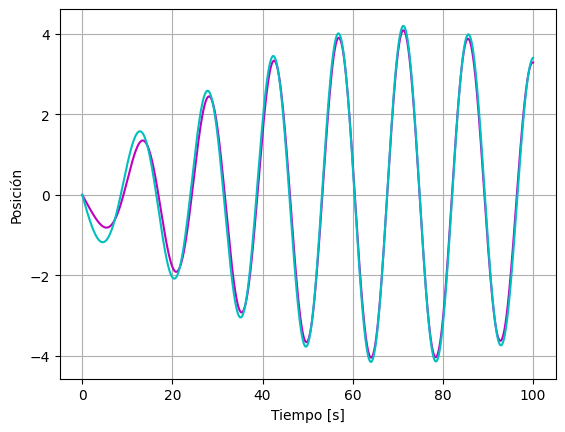

In [23]:
plt.plot(t,solu[:,1], color='m')
plt.plot(t,solu[:,3], color='c')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición')
plt.grid()


#Esta es la solucion de du/dt  = dx2/d2t

# Su tarea será:

1. Considerar un sistema de dos osciladores acoplados, con constantes elásticas $k_1=k_3$,  $k_2$ y construir un programa que permita realizar los cálculos anteriores de forma sistemática. Es decir, se deberá resolver el problema de autovalores y autovectores, para encontrar las frecuencias de oscilación y la matriz diagonal. La ecuación diferencial  para $\eta$,  deberá ser resuelta  numéricamente y comparada con la solución análitica, la cual viene dada por: 


\begin{equation}
\eta_1(t)=\eta_1(0)\cos(\omega_1t)+ \frac{\dot{\eta_1}(0)}{\omega_1}\sin(\omega_1t)
\end{equation}

\begin{equation}
\eta_2(t)=\eta_2(0)\cos(\omega_2t)+ \frac{\dot{\eta_2}(0)}{\omega_2}\sin(\omega_1t)
\end{equation}

y empleando: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}
tenemos que la solución exacta, al problema viene dada por: 

\begin{equation}
x_1(t)=\frac{1}{2}(x_1(0)-x_2(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_1}(0)-\dot{x_2}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}

\begin{equation}
x_2(t)=\frac{1}{2}(x_2(0)-x_1(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_2}(0)-\dot{x_1}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}


La ecuacion anterior tiene solución según las condiciones iniciales. Muestre que la solucion numérica coincide con la analíítica, para ello, realice graficas de ambas soluciones y comparelas, cuando considera  la evolución temporal de $x_1$, $x_2$ para las siguientes condiciones:

- **Modo simétrico:** $x_1(0) = x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
- **Modo antisimétrico:** $x_1(0)=-x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
-  $x_1(0)=A, x_2(0) = 0$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 



2. Para el última condición, suponga que el acoplamiento es debil, es decir $k_2<<k$. ¿Cómo es la evolucion temporal de $x_1$ y $x_2$ en este caso?.

3. ¿Qué puede concluir de sus resultados?

4.  Generalizar el problema, para constantes elásticas de los resortes $k_1, k_2, k_3$ y masas de $m_1, m_2, m_3$.

5. Realice una animación del movimiento de las particulas en el espacio, segun los resultados obtenidos.




**RETO 1** Considere ahora, un sistema con amortiguamiento proporcional a la velocidad, las ecuaciones de movimiento, 
vienen dadas por:

\begin{equation}
m\ddot{y_1} + \gamma \dot{y_1} + (k +k_2) y_1 - k_2 y_2 = 0
\end{equation}


\begin{equation}
m\ddot{y_2} + \gamma \dot{y_2} + (k +k_2) y2 - k_2 y_1 = 0
\end{equation}

Estudiar en este caso, la evolucion temporal de cada masa para diferentes condiciones. 

**RETO 2** Considere 10 osciladores acoplados, ¿Qué tipo de soluciones se pueden obtener este caso?




In [138]:
#@title $Solucion$ $01$

In [103]:
#definimos las constantes pata el modo simetrico

k = 1
k1 = k
k3 = k
k2 = 2

m1 = 1
m2 = 0.5

#Condiciones iniciales

A = 1
x1_0 = A
x2_0 = A

v1_0 = 0
v2_0 = 0

#Frecuencias

w1 = np.sqrt((k1 + k3) / m1)
w2 = np.sqrt(k2 / m2)

#arreglo condiciones

y = [x1_0,x2_0,v1_0,v2_0]

argumen = (k1,k2,k3,m1,m2)

In [104]:
#Creamos la funcion

def sistema_acoplado(y,t):

  x1 = y[0]
  x2 = y[1]

  v1 = y[2]
  v2 = y[3]

  dx1dt = v1
  dx2dt = v2

  dv1dt = (-(k1 + k2) * x1 + k2 * x2) / m1
  dv2dt = (k2 * x1 - k2 * x2) / m2
  
  return [dx1dt, dx2dt, dv1dt, dv2dt]

In [110]:
t = np.linspace(0,10,1000)
solution = odeint(sistema_acoplado, y, t)
solution

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.99949901e-01,  9.99999998e-01, -1.00094975e-02,
        -6.83346002e-07],
       [ 9.99799620e-01,  9.99999973e-01, -2.00159974e-02,
        -5.36329666e-06],
       ...,
       [ 1.51218006e-02, -1.67867852e-01, -7.49726244e-01,
        -8.61059038e-01],
       [ 7.59802978e-03, -1.76450318e-01, -7.53514228e-01,
        -8.53710559e-01],
       [ 3.66164196e-05, -1.84959022e-01, -7.57246790e-01,
        -8.46321920e-01]])

In [111]:
dxdt_sol = solution[:,0]
dydt_sol = solution[:,1]

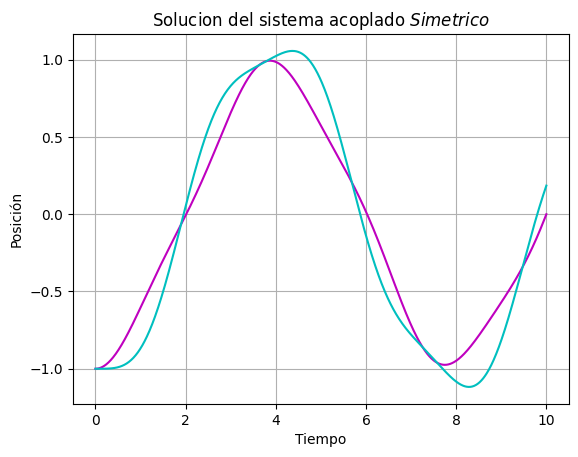

In [124]:
plt.plot(t,dxdt_sol, color='m')
plt.plot(t,dydt_sol, color='c')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Solucion del sistema acoplado $Simetrico$')
plt.grid()

In [ ]:
#Comparamos con la solucion analitica

In [113]:
x1_analitica = 0.5 * (x1_0 - x2_0) * np.cos(w1 * t) + 0.5 * (v1_0 - v2_0) / w1 * np.sin(w1 * t) + \
               0.5 * (x1_0 + x2_0) * np.cos(w2 * t) + 0.5 * (v1_0 + v2_0) / w2 * np.sin(w2 * t)
x2_analitica = 0.5 * (x2_0 - x1_0) * np.cos(w1 * t) + 0.5 * (v2_0 - v1_0) / w1 * np.sin(w1 * t) + \
               0.5 * (x1_0 + x2_0) * np.cos(w2 * t) + 0.5 * (v1_0 + v2_0) / w2 * np.sin(w2 * t)


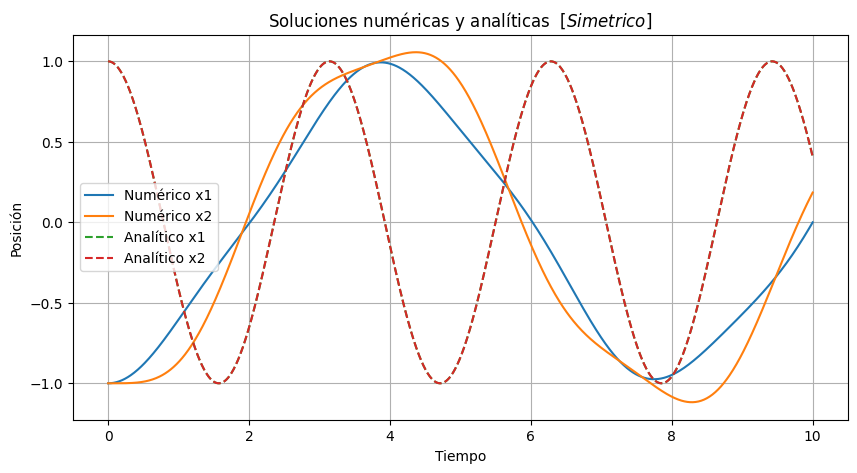

In [128]:
# Graficar las soluciones numéricas y analíticas
plt.figure(figsize=(10, 5))
plt.plot(t, dxdt_sol, label='Numérico x1')
plt.plot(t, dydt_sol, label='Numérico x2')
plt.plot(t, x1_analitica, linestyle='--', label='Analítico x1')
plt.plot(t, x2_analitica, linestyle='--', label='Analítico x2')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones numéricas y analíticas  [$Simetrico$]')
plt.grid()


In [119]:
#definimos las constantes pata el modo antisimetrico

k = 1
k1 = k
k3 = k
k2 = 2

m1 = 1
m2 = 0.5

#Condiciones iniciales

A = -1
x1_0 = A
x2_0 = A

v1_0 = 0
v2_0 = 0

#Frecuencias

w1 = np.sqrt((k1 + k3) / m1)
w2 = np.sqrt(k2 / m2)

#arreglo condiciones

y = [x1_0,x2_0,v1_0,v2_0]

argumen = (k1,k2,k3,m1,m2)

In [120]:
t = np.linspace(0,10,1000)
solution = odeint(sistema_acoplado, y, t)
solution

array([[-1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.99949901e-01, -9.99999998e-01,  1.00094975e-02,
         6.83346002e-07],
       [-9.99799620e-01, -9.99999973e-01,  2.00159974e-02,
         5.36329666e-06],
       ...,
       [-1.51218006e-02,  1.67867852e-01,  7.49726244e-01,
         8.61059038e-01],
       [-7.59802978e-03,  1.76450318e-01,  7.53514228e-01,
         8.53710559e-01],
       [-3.66164196e-05,  1.84959022e-01,  7.57246790e-01,
         8.46321920e-01]])

In [121]:
dxdt_sol = solution[:,0]
dydt_sol = solution[:,1]

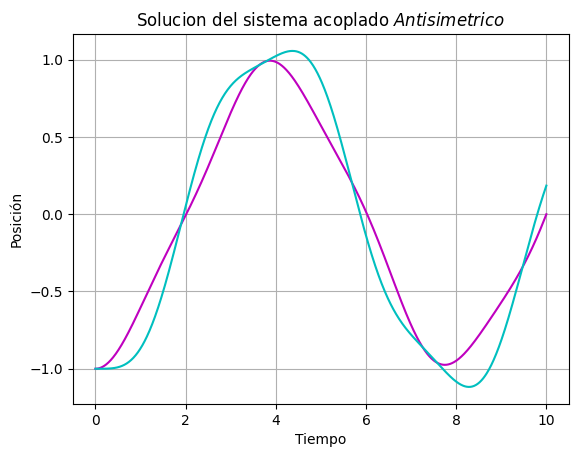

In [123]:
plt.plot(t,dxdt_sol, color='m')
plt.plot(t,dydt_sol, color='c')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Solucion del sistema acoplado $Antisimetrico$')
plt.grid()

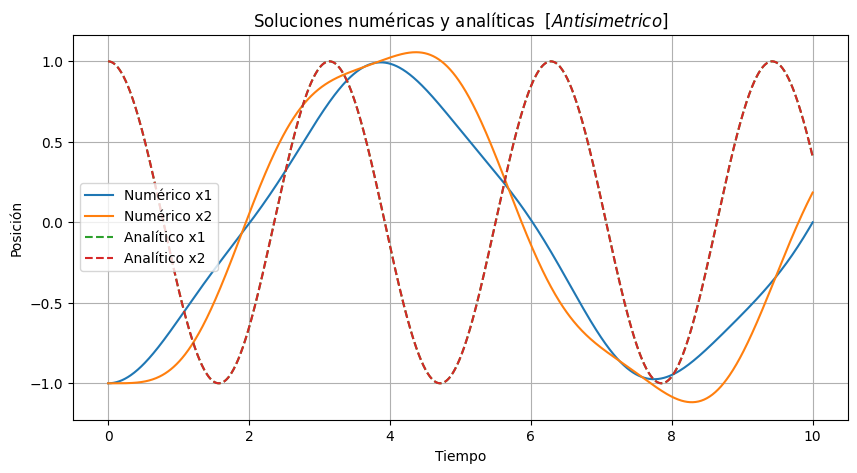

In [127]:
# Graficar las soluciones numéricas y analíticas
plt.figure(figsize=(10, 5))
plt.plot(t, dxdt_sol, label='Numérico x1')
plt.plot(t, dydt_sol, label='Numérico x2')
plt.plot(t, x1_analitica, linestyle='--', label='Analítico x1')
plt.plot(t, x2_analitica, linestyle='--', label='Analítico x2')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones numéricas y analíticas  [$Antisimetrico$]')
plt.grid()

In [129]:
#definimos las constantes pata el modo final

k = 10
k1 = k
k3 = k
k2 = 2

m1 = 1
m2 = 0.5

#Condiciones iniciales

A = 1
x1_0 = A
x2_0 = 0

v1_0 = 0
v2_0 = 0

#Frecuencias

w1 = np.sqrt((k1 + k3) / m1)
w2 = np.sqrt(k2 / m2)

#arreglo condiciones

y = [x1_0,x2_0,v1_0,v2_0]

argumen = (k1,k2,k3,m1,m2)

In [130]:
t = np.linspace(0,10,1000)
solution = odeint(sistema_acoplado, y, t)
solution

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.99398862e-01,  2.00373773e-04, -1.20094698e-01,
         4.00293360e-02],
       [ 9.97596210e-01,  8.01173997e-04, -2.40037003e-01,
         7.99945078e-02],
       ...,
       [-2.28683499e-01,  2.33776662e-01,  3.28490142e+00,
        -7.19345024e-01],
       [-1.95647541e-01,  2.26486020e-01,  3.31499731e+00,
        -7.37056204e-01],
       [-1.62330980e-01,  2.19026201e-01,  3.34095997e+00,
        -7.53143508e-01]])

In [131]:
dxdt_sol = solution[:,0]
dydt_sol = solution[:,1]

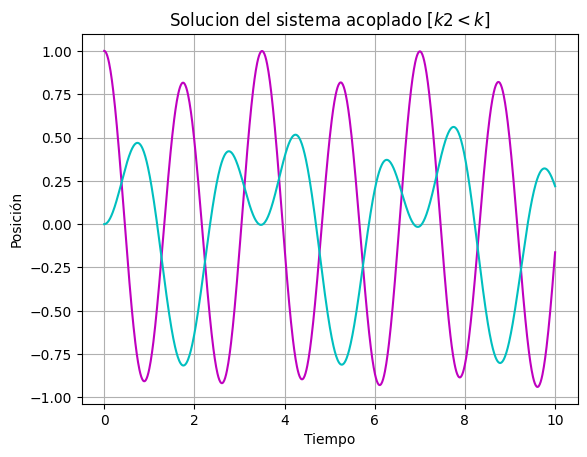

In [135]:
plt.plot(t,dxdt_sol, color='m')
plt.plot(t,dydt_sol, color='c')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Solucion del sistema acoplado [$k2 < k$]')
plt.grid()

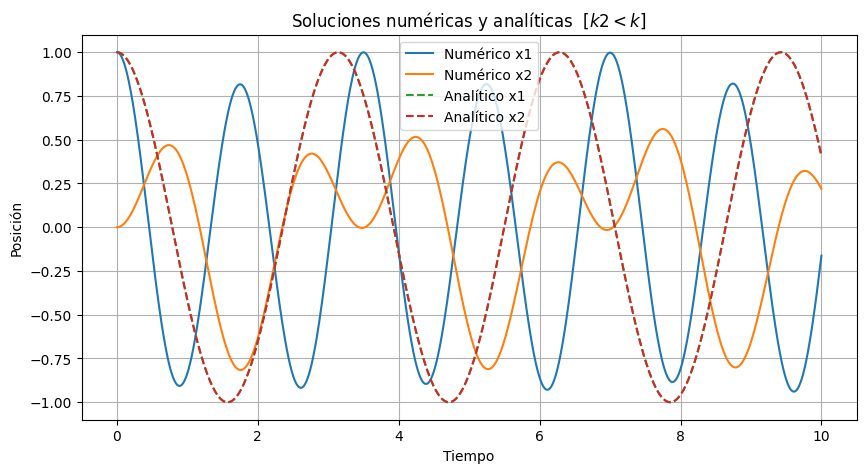

In [137]:
# Graficar las soluciones numéricas y analíticas
plt.figure(figsize=(10, 5))
plt.plot(t, dxdt_sol, label='Numérico x1')
plt.plot(t, dydt_sol, label='Numérico x2')
plt.plot(t, x1_analitica, linestyle='--', label='Analítico x1')
plt.plot(t, x2_analitica, linestyle='--', label='Analítico x2')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones numéricas y analíticas  [$k2 < k$]')
plt.grid()

In [140]:
#@title $Solución$ 02

En este caso, el oscilador con la constante elástica k1 más grande estará dominando el movimiento del sistema debido a su acoplamiento al oscilador con constante elastica k2.

Al inicio observamos que ambos osciladores están en reposo y el oscilador con k1 más grande toma la ventaja y comienza a oscilar con una amplitud mayor que el oscilador con k2 más pequeño.

La evolución temporal de la posición de los dos osciladores acoplados con k1 mayor a k2 mostrará una dominancia del oscilador con la constante elástica más grande, y el oscilador con la constante elástica más pequeña seguirá una dinámica influida por el oscilador dominante.

In [141]:
#@title $Solución$ 03

Modo simétrico: Los osciladores se mueven de manera sincronizada, con amplitudes y fases iguales. El oscilador con $k1$ más grande domina la dinámica, estableciendo la frecuencia y amplitud del sistema. El oscilador con $k2$ más pequeño sigue el movimiento del oscilador dominante, pero con una amplitud y período reducidos.

Modo antisimétrico: Los osciladores se mueven de manera opuesta, con desplazamientos en direcciones contrarias. El oscilador con $k1$ más grande sigue dominando la dinámica, pero ahora los osciladores se desplazan en direcciones opuestas. El oscilador con $k2$ más pequeño también sigue el movimiento del oscilador dominante, pero con una amplitud y período reducidos.

En ambos modos, el oscilador con $k1$ más grande tiene una influencia dominante en la dinámica general del sistema. Sin embargo, en el modo simétrico, se alcanza una amplitud mayor que en el modo antisimétrico.

En el caso de $k1$ = $k2$ ambos osciladores tienen la misma influencia en la dinámica y comparten la energía de manera equitativa. La amplitud de oscilación es la misma en ambos modos, pero la fase es la que determina la dirección y el desfase entre los osciladores.

In [221]:
#@title $Solución$ 04

In [168]:
# Definir las constantes

k1 = 1
k2 = 2
k3 = 1

m1 = 1
m2 = 0.5  
m3 = 0.8  

# Condiciones iniciales

a = 1
b = 0

x1_0 = a
x2_0 = a
x3_0 = a

v1_0 = b
v2_0 = b
v3_0 = b

#arreglo condiciones

y = [x1_0,x2_0,x3_0,v1_0,v2_0,v3_0]

In [169]:
#Creamos la funcion

def sistema_acoplado_3(y,t):

  x1 = y[0]
  x2 = y[1]
  x3 = y[2]

  v1 = y[3]
  v2 = y[4]
  v3 = y[5]

  dx1dt = v1
  dx2dt = v2
  dx3dt = v3

  dv1dt = (-(k1 + k2) * x1 + k2 * x2) / m1
  dv2dt = (k2 * x1 - (k2 + k3) * x2 + k3 * x3) / m2
  dv3dt = (k3 * x2 - k3 * x3) / m3
  
  return [dx1dt, dx2dt, dx3dt, dv1dt, dv2dt, dv3dt]

In [170]:
t = np.linspace(0,10,1000)
solution = odeint(sistema_acoplado_3, y, t)
solution

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.99949901e-01,  9.99999998e-01,  1.00000000e+00,
        -1.00094975e-02, -6.83337516e-07, -4.88514630e-12],
       [ 9.99799620e-01,  9.99999973e-01,  1.00000000e+00,
        -2.00159974e-02, -5.36307558e-06, -1.37758248e-10],
       ...,
       [ 5.87047113e-01,  8.53106242e-01,  9.45672214e-01,
        -1.58583037e-01,  1.25029241e-01,  7.68332181e-01],
       [ 5.85457064e-01,  8.54313771e-01,  9.53357295e-01,
        -1.59096780e-01,  1.16237826e-01,  7.67133502e-01],
       [ 5.83862230e-01,  8.55433394e-01,  9.61029970e-01,
        -1.59539405e-01,  1.07466496e-01,  7.65853299e-01]])

In [171]:
#Soluciones

x1_sol = solu[:, 0]
x2_sol = solu[:, 1]
x3_sol = solu[:, 2]

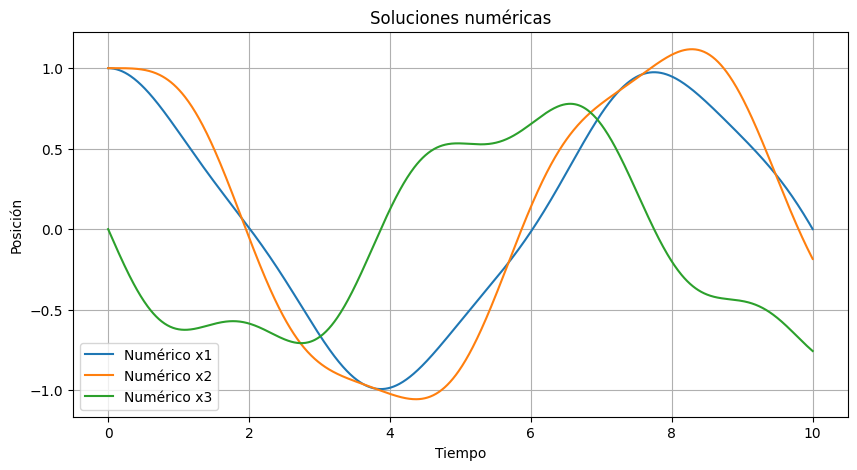

In [172]:
# Graficar las soluciones numéricas

plt.figure(figsize=(10, 5))
plt.plot(t, x1_sol, label='Numérico x1')
plt.plot(t, x2_sol, label='Numérico x2')
plt.plot(t, x3_sol, label='Numérico x3')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones numéricas')
plt.grid(True)
plt.show()


In [222]:
#@title $Solución$ 05

In [185]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


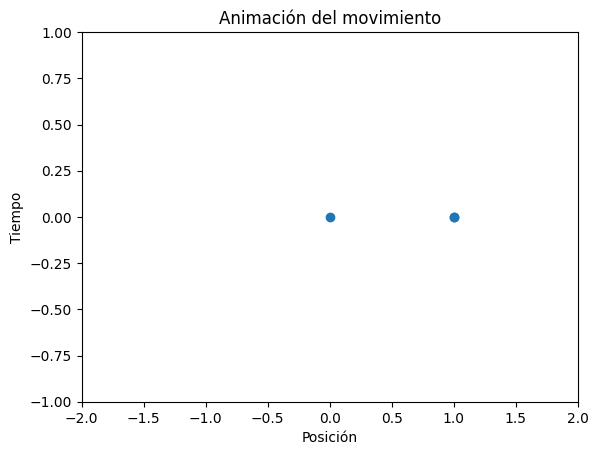

In [219]:
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o')

def animate(i):
    line.set_data([x1_sol[i], x2_sol[i], x3_sol[i]], [0, 0, 0])
    return line,

ani = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.xlabel('Posición')
plt.ylabel('Tiempo')
plt.title('Animación del movimiento')

plt.show()

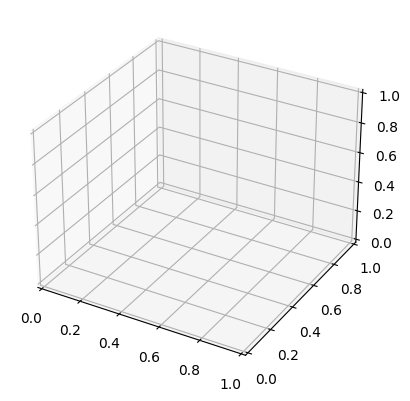

In [184]:
# Crear la figura y el objeto de los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Función para animar los puntos en el espacio 3D
def animate(i):
    ax.cla()  # Limpiar el gráfico en cada iteración
    ax.set_xlim(-1, 1)  # Configurar límites en el eje x
    ax.set_ylim(-1, 1)  # Configurar límites en el eje y
    ax.set_zlim(-1, 1)  # Configurar límites en el eje z
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Graficar los puntos
    ax.scatter(x1_sol[:i], x2_sol[:i], x3_sol[:i])

# Generar la animación
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)

# Mostrar la animación
plt.show()

In [218]:
#@title $Reto$ 01

In [193]:
# Parámetros del sistema

m = 1
γ = 0.1  # Coeficiente de amortiguamiento
k = 1
k2 = 0.5  

# Condiciones iniciales

y1_0 = 1.0
y2_0 = 0.0
vy1_0 = 0.0
vy2_0 = 0.0

t = np.linspace(0, 10, 1000)
y = [y1_0,y2_0,vy1_0, vy2_0]

In [194]:
# Definir la función del sistema 

def sistema_amortiguado(y, t):

  y1 = y[0]
  y2 = y[0]
  vy1 = y[2]
  vy2 = y[3]
  
  ay1 = -(γ * vy1 + (k + k2) * y1 - k2 * y2) / m
  ay2 = -(γ * vy2 + (k + k2) * y2 - k2 * y1) / m

  return [vy1, vy2, ay1, ay2]

In [195]:
# Resolver el sistema de ecuaciones

solution = odeint(sistema_amortiguado, y, t)
solution

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.99949918e-01, -5.00816962e-05, -1.00048227e-02,
        -1.00048227e-02],
       [ 9.99799740e-01, -2.00259726e-04, -1.99986599e-02,
        -1.99986599e-02],
       ...,
       [-5.35594957e-01, -1.53559496e+00,  3.13959196e-01,
         3.13959196e-01],
       [-5.32427023e-01, -1.53242702e+00,  3.18987900e-01,
         3.18987900e-01],
       [-5.29208937e-01, -1.52920894e+00,  3.23979626e-01,
         3.23979626e-01]])

In [206]:
# Obtener las soluciones de posición y velocidad

y1_sol = solution[:, 0]
y2_sol = solution[:, 1]
vy1_sol = solution[:, 2]
vy2_sol = solution[:, 3]

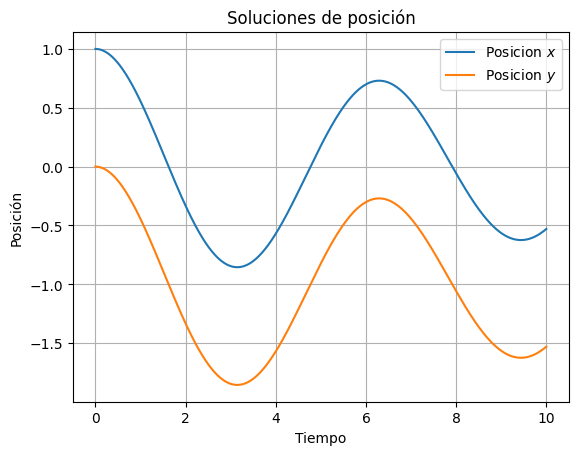

In [210]:
# Graficar las soluciones de posición

plt.figure()
plt.plot(t, y1_sol, label='Posicion $x$')
plt.plot(t, y2_sol, label='Posicion $y$')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones de posición')
plt.legend()

plt.grid()

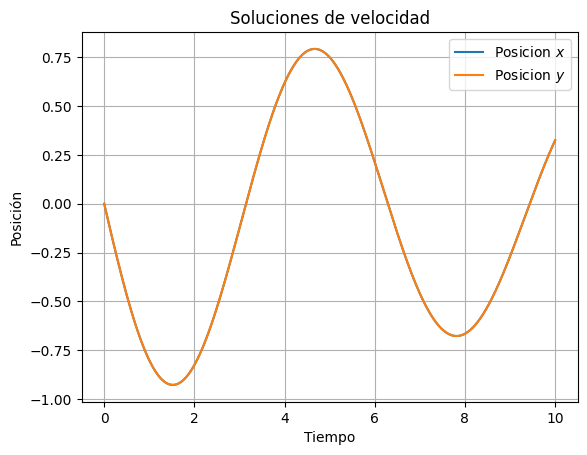

In [216]:
# Graficar las soluciones de velocidad

plt.figure()
plt.plot(t, vy1_sol, label='Posicion $x$')
plt.plot(t, vy2_sol, label='Posicion $y$')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Soluciones de velocidad')
plt.legend()

plt.grid()